<a href="https://colab.research.google.com/github/RusiruPabasara/Calories-Burnt-Prediction-ML-Regression-Model/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calories Burnt Prediction Regression Model**





Rusiru Pabasara



*   **Objective**: The primary goal of the model is to accurately predict the calorie expenditure (calories burnt) by individuals during physical activities
*   **Model Type** : The model is a regression model, specifically designed for continuous target variables, such as calorie counts.
*   **Features**: The model utilizes various input features (independent variables) such as gender, age, height, weight, duration of exercise, heart rate, and body temperature to make predictions.
*   **Development**: The model is developed using Python programming language within a Google colad notebook environment. Libraries such as pandas, scikit-learn, and XGBoost are likely used for data manipulation, model building, and evaluation.
*   **Training and Evaluation**: The model is trained on a dataset that contains historical records of individuals' characteristics and corresponding calorie expenditures. Evaluation metrics such as Mean Absolute Error (mae) and R-squared value are likely used to assess the model's performance.
*   **Interpretation**: The model's predictions can provide valuable insights into the factors influencing calorie expenditure during physical activities. It can help individuals and professionals in fields such as fitness, healthcare, and sports performance to better understand and optimize their exercise routines.







In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

Data Importing & Data Pre-Processing

In [ ]:
# loading th data from CSV file to pandas Dataframe
calories = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/calories.csv')

In [ ]:
# print first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exercise.csv')

In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
#Combining the calorie and exercise dataframes
df = pd.concat([exercise, calories['Calories']],axis=1)

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# check the numbers of rows and columns in df dataframe
df.shape

(15000, 9)

In [ ]:
# checking some important information about this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking missing values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

There is no missing values in this dataset. In the data preprocrssing part we concatonate the two dataframe into one dataframe.Now let's go to the data Analysis part.

Data Analysis

In [ ]:
# get statistical measurment description about the dataframe
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

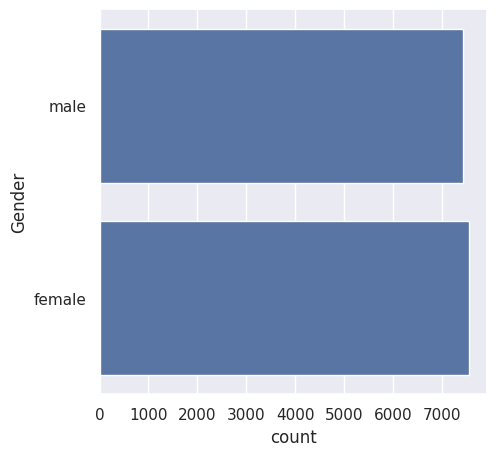

In [ ]:
#plot the gender variable (categorical)
plt.figure(figsize=(5,5))
sns.countplot(df['Gender'])

 We can see that male and female count is approxiamtely equal in above count plot. So the distribution of gender is good in our dataset.

<Figure size 500x500 with 0 Axes>

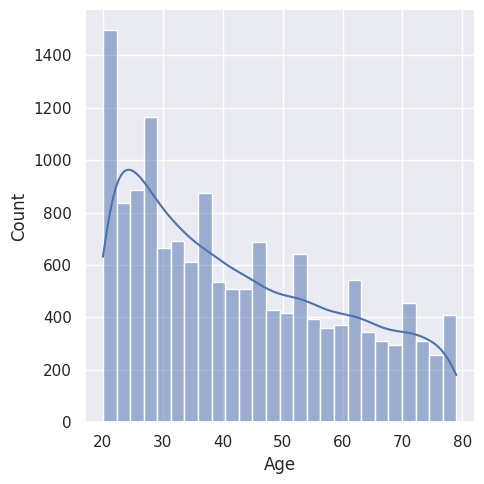

In [ ]:
#finding the distribution of age variable(quantitative)
plt.figure(figsize=(5,5))
sns.displot(df['Age'],kde=True)

<Figure size 500x500 with 0 Axes>

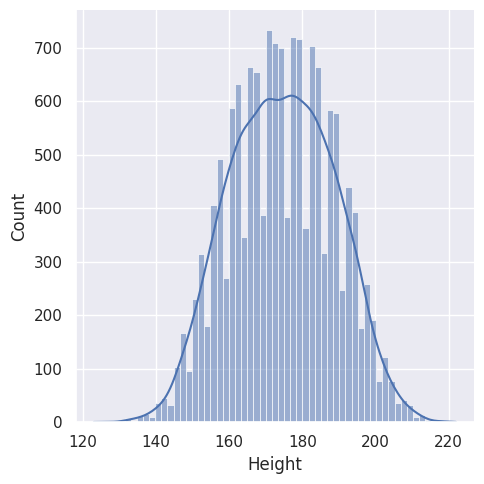

In [ ]:
#finding the distribution of height variable(quantitative)
plt.figure(figsize=(5,5))
sns.displot(df['Height'],kde=True)

Height distribution exhibits normality.

<Axes: xlabel='Weight', ylabel='Count'>

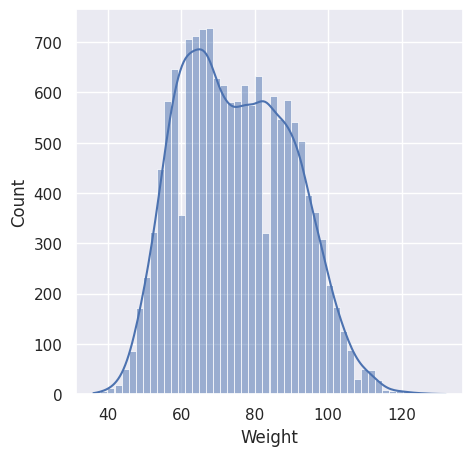

In [ ]:
#finding the distribution of weight variable(quantitative)
plt.figure(figsize=(5,5))
sns.histplot(df['Weight'],kde=True)

<Figure size 500x500 with 0 Axes>

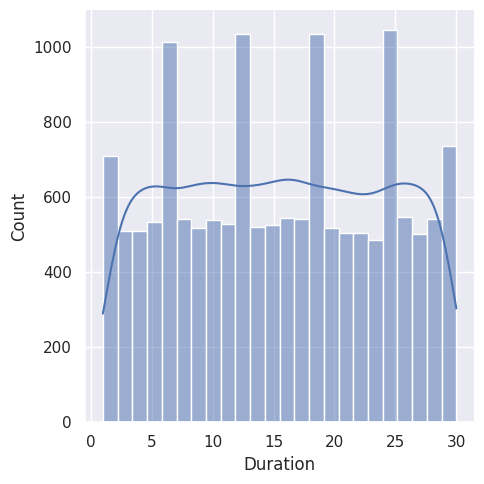

In [ ]:
#finding the distribution of duration variable(quantitative)
plt.figure(figsize=(5,5))
sns.displot(df['Duration'],kde=True)

<Figure size 500x500 with 0 Axes>

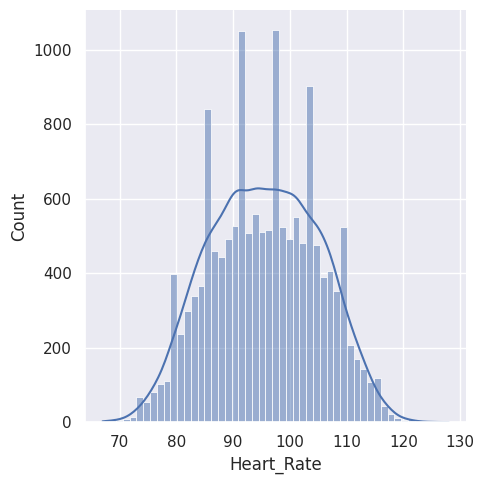

In [ ]:
#finding the distribution of heart rate variable(quantitative)
plt.figure(figsize=(5,5))
sns.displot(df['Heart_Rate'],kde=True)

<Figure size 500x500 with 0 Axes>

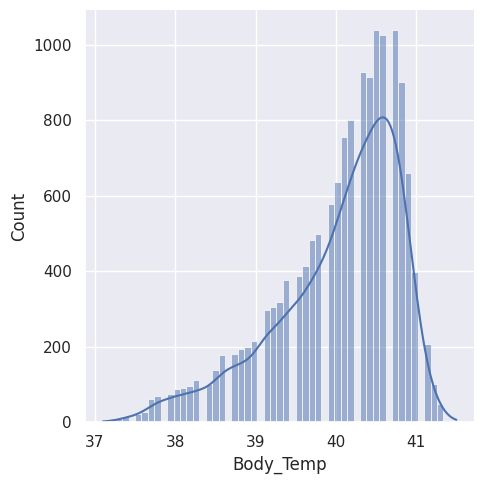

In [ ]:
#finding the distribution of body temperature variable(quantitative)
plt.figure(figsize=(5,5))
sns.displot(df['Body_Temp'],kde=True)

<Figure size 500x500 with 0 Axes>

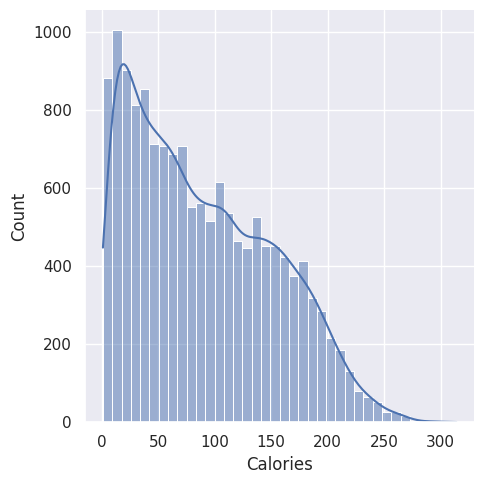

In [ ]:
#finding the distribution of calories variable(quantitative)
plt.figure(figsize=(5,5))
sns.displot(df['Calories'],kde=True)

Find the correlations of variables

1. Positive Correlation
2. Negative Correlation

In [ ]:
# Drop the 'gender' column
df_without_gender = df.drop(columns=['Gender'],axis=1)
correlation = df_without_gender.corr()

<Axes: >

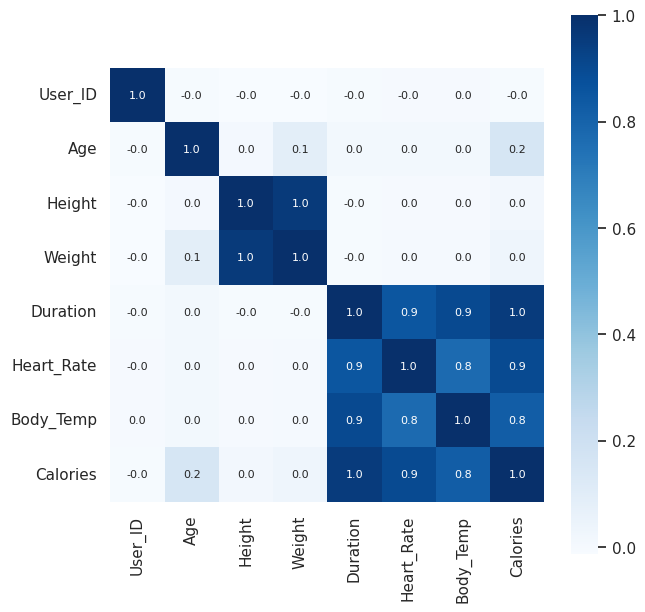

In [ ]:
#plotting heatmap to understand correlation
plt.figure(figsize=(7,7))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

1. duration, heart rate, body tempureature positively correlated with calories,when they increaese the caloreies are also increases.
2. calories and weight is negatively correlated with age variable.

As 'Duration' and 'Calories' have a correlation coefficient of 1, it indicates a perfect linear relationship, making 'Duration' unnecessary for estimating the use of calories.

Feature Encoding

Text data (e.g., gender) is converted into numerical values for modeling purposes.

In [ ]:
df.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Seperating features and Targets

In [ ]:
X = df.drop(columns=['User_ID','Calories'],axis=1)
Y = df['Calories']

In [ ]:
print(X) #features

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y) #target

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Data Splitting

The dataset is split into training and testing sets using the train_test_split function from scikit-learn.

In [ ]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X, Y, test_size=0.1, random_state=2) #10% test data and 90% train data

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (13500, 7) (1500, 7)


Model Training & Evaluation

An XGBoost regression model is trained on the training data and evaluated using Mean Absolute Error (MAE) and R-squared value metrics.

XG Boost Regressor

In [ ]:
#loading the ML model
model = XGBRegressor()

In [ ]:
#This line of code trains your ML model using the training data
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction the test data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[125.93621  221.98837   40.1335   ...  55.216927  66.620316 180.15579 ]


Mean Absolute error

In [ ]:
mae = metrics.mean_absolute_error(Y_test ,test_data_prediction) # y_test is original values and test_data_prediction is predict values

In [ ]:
print("Mean absolute error = ", mae) # mae should be low value

Mean absolute error =  1.3719980459610621


In [ ]:
# Calculate R-squared value
r_squared = r2_score(Y_test, test_data_prediction)

In [ ]:
print("R squred value = ",r_squared) # R squared value measures goodness of fit in the model. It should be greater than 85% for a good model fit.

R squred value =  0.9989969382373513


 R-squared value of 99.89% suggests that the model is performing exceptionally well in explaining and predicting the calories burn based on the provided features.








Model Testing & Evaluation

The trained model is further evaluated using the testing data to ensure generalizability and robustness.

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_test and Y_test
model.fit(X_test, Y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction the train data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[128.11559  223.82436   37.367653 ...  54.994503  69.21072  179.01341 ]


Mean Absolute error

In [ ]:
mae = metrics.mean_absolute_error(Y_test ,test_data_prediction) # y_test is original values and test dataprediction is predict values

In [ ]:
print("Mean absolute error = ", mae) # mae should be low value

Mean absolute error =  0.38787183662255603


In [ ]:
# Calculate R-squared value
r_squared = r2_score(Y_test, test_data_prediction)

In [ ]:
print("R squred value = ",r_squared)

R squred value =  0.9999183765411656


R-squared value of 99.99% suggests that the model is performing exceptionally well in explaining and predicting the calories burn based on the provided features

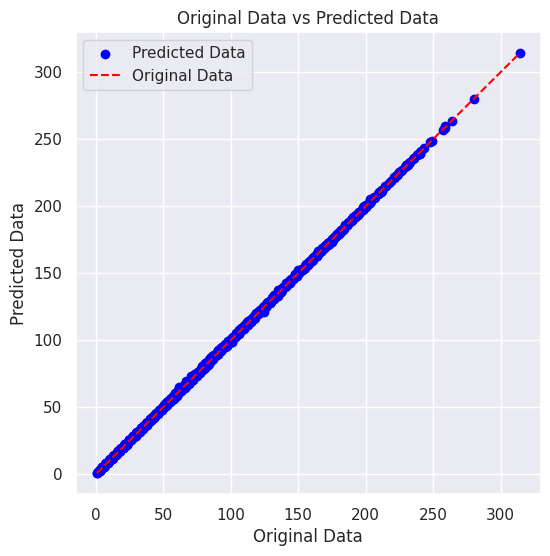

In [ ]:
import matplotlib.pyplot as plt

# Plotting original data vs predicted data
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, test_data_prediction, color='blue', label='Predicted Data')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Original Data')
plt.title('Original Data vs Predicted Data')
plt.xlabel('Original Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.show()


Therefore according to the plot and the R squared value we can consider this trained model is accurate.